# Load Data, Data Wrangling, Train Dataset and Test Dataset Preparation

In [224]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, zero_one_loss, precision_recall_fscore_support
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import time

a = time.time()

In [225]:
RegularSeason_df = pd.read_csv('Data/RegularSeasonDetailedResults.csv')
Tourney_df = pd.read_csv('Data/TourneyDetailedResults.csv')

In [226]:
RegularSeason_df = RegularSeason_df.drop(['Season', 'Daynum', 'Wloc', 'Numot'], axis = 1)
Tourney_df = Tourney_df.drop(['Season', 'Daynum', 'Wloc', 'Numot'], axis = 1)

In [227]:
# Training Data
WinLosePair_df = RegularSeason_df
WinLosePair_df

,Wteam,Wscore,Lteam,Lscore,Wfgm,Wfga,Wfgm3,Wfga3,Wftm,Wfta,...,Lfga3,Lftm,Lfta,Lor,Ldr,Last,Lto,Lstl,Lblk,Lpf
0,1104,68,1328,62,27,58,3,14,11,18,...,10,16,22,10,22,8,18,9,2,20
1,1272,70,1393,63,26,62,8,20,10,19,...,24,9,20,20,25,7,12,8,6,16
2,1266,73,1437,61,24,58,8,18,17,29,...,26,14,23,31,22,9,12,2,5,23
3,1296,56,1457,50,18,38,3,9,17,31,...,22,8,15,17,20,9,19,4,3,23
4,1400,77,1208,71,30,61,6,14,11,13,...,16,17,27,21,15,12,10,7,1,14
5,1458,81,1186,55,26,57,6,12,23,27,...,11,12,17,6,22,8,19,4,3,25
6,1161,80,1236,62,23,55,2,8,32,39,...,15,20,28,9,21,11,30,10,4,28
7,1186,75,1457,61,28,62,4,14,15,21,...,17,17,23,8,25,10,15,14,8,18
8,1194,71,1156,66,28,58,5,11,10,18,...,18,12,27,13,26,13,25,8,2,18
9,1458,84,1296,56,32,67,5,17,15,19,...,14,7,12,9,23,10,18,1,3,18


In [228]:
TrainDataOriginal_1_df = pd.DataFrame(WinLosePair_df[\
                                           ['Wfgm', 'Wfga', 'Wfgm3', 'Wfga3', 'Wftm', 'Wfta', 'Wor', 'Wdr', 'Wast', 'Wto', 'Wstl', 'Wblk', 'Wpf',\
                                           'Lfgm', 'Lfga', 'Lfgm3', 'Lfga3', 'Lftm', 'Lfta', 'Lor', 'Ldr', 'Last', 'Lto', 'Lstl', 'Lblk', 'Lpf']])\
.rename(columns = {'Wfgm':'fgm_x', 'Wfga':'fga_x', 'Wfgm3':'fgm3_x', 'Wfga3':'fga3_x', 'Wftm':'ftm_x', 'Wfta':'fta_x', 'Wor':'or_x', 'Wdr':'dr_x', 'Wast':'ast_x', 'Wto':'to_x', 'Wstl':'stl_x', 'Wblk':'blk_x', 'Wpf':'pf_x',\
                  'Lfgm':'fgm_y', 'Lfga':'fga_y', 'Lfgm3':'fgm3_y', 'Lfga3':'fga3_y', 'Lftm':'ftm_y', 'Lfta':'fta_y', 'Lor':'or_y', 'Ldr':'dr_y', 'Last':'ast_y', 'Lto':'to_y', 'Lstl':'stl_y', 'Lblk':'blk_y', 'Lpf':'pf_y'})\
.reset_index(drop = True)

TrainDataOriginal_2_df = pd.DataFrame(WinLosePair_df[\
                                           ['Lfgm', 'Lfga', 'Lfgm3', 'Lfga3', 'Lftm', 'Lfta', 'Lor', 'Ldr', 'Last', 'Lto', 'Lstl', 'Lblk', 'Lpf',\
                                           'Wfgm', 'Wfga', 'Wfgm3', 'Wfga3', 'Wftm', 'Wfta', 'Wor', 'Wdr', 'Wast', 'Wto', 'Wstl', 'Wblk', 'Wpf']])\
.rename(columns = {'Lfgm':'fgm_x', 'Lfga':'fga_x', 'Lfgm3':'fgm3_x', 'Lfga3':'fga3_x', 'Lftm':'ftm_x', 'Lfta':'fta_x', 'Lor':'or_x', 'Ldr':'dr_x', 'Last':'ast_x', 'Lto':'to_x', 'Lstl':'stl_x', 'Lblk':'blk_x', 'Lpf':'pf_x',\
                  'Wfgm':'fgm_y', 'Wfga':'fga_y', 'Wfgm3':'fgm3_y', 'Wfga3':'fga3_y', 'Wftm':'ftm_y', 'Wfta':'fta_y', 'Wor':'or_y', 'Wdr':'dr_y', 'Wast':'ast_y', 'Wto':'to_y', 'Wstl':'stl_y', 'Wblk':'blk_y', 'Wpf':'pf_y'})\
.reset_index(drop = True)


TrainData_df = TrainDataOriginal_1_df.append(TrainDataOriginal_2_df).reset_index(drop = True)
TrainData = TrainData_df.values
TrainLabel = np.ones((len(WinLosePair_df)*2))
TrainLabel[len(WinLosePair_df):] = 2

In [229]:
# Test Data
Season2018_df = pd.read_csv('Data/2018.csv', skiprows = 1)
NCAA_df = Season2018_df[Season2018_df['School'].str.contains('NCAA')]
NCAA_df['School'] = NCAA_df['School'].map(lambda x: x.rstrip(' NCAA'))
NCAA_df

/Users/edwardwu/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Rk,School,G,W,L,W-L%,SRS,SOS,W.1,L.1,...,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,Unnamed: 34
6,7,Alabama,36,20,16,0.556,12.34,10.64,8,10,...,828,0.670,358,1290,458,228,192,513,676,NaN
11,12,Arizona State,32,20,12,0.625,14.37,6.56,8,10,...,793,0.733,315,1127,458,209,114,343,604,NaN
12,13,Arizona,35,27,8,0.771,15.67,6.84,14,4,...,741,0.760,352,1277,531,173,158,426,603,NaN
16,17,Arkansas,35,23,12,0.657,14.76,9.85,10,8,...,793,0.681,350,1208,501,218,163,381,700,NaN
18,19,Auburn,34,26,8,0.765,15.97,7.29,13,5,...,836,0.774,403,1290,481,252,180,411,672,NaN
33,34,Bucknell,35,25,10,0.714,4.48,-3.46,16,2,...,872,0.719,324,1281,505,194,152,437,655,NaN
34,35,Buffalo,36,27,9,0.750,7.99,0.25,15,3,...,695,0.699,426,1388,597,225,146,446,755,NaN
35,36,Butler,35,21,14,0.600,16.92,10.55,9,9,...,562,0.776,319,1198,489,232,100,391,642,NaN
38,39,Cal State Fullerton,32,20,12,0.625,-0.92,-1.02,10,6,...,745,0.729,276,1123,403,201,106,455,578,NaN
55,56,Cincinnati,36,31,5,0.861,20.25,3.53,16,2,...,756,0.692,477,1413,570,256,194,404,561,NaN


In [230]:
ncaa2018_df = pd.read_csv('Data/ncaa2018.csv')
ncaa2018_df

,School_x,School_y,Results
0,Kansas,Penn,1
1,Seton Hall,North Carolina State,1
2,Clemson,New Mexico State,1
3,Auburn,College of Charleston,1
4,Texas Christian,Syracuse,2
5,Michigan State,Bucknell,1
6,Rhode Island,Oklahoma,1
7,Duke,Iona,1
8,Kansas,Seton Hall,1
9,Clemson,Auburn,1


In [231]:
clf = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(clf, TrainData, TrainLabel)
scores.mean() 

0.97283913828414004

In [232]:
# Trying out random forest and gradient boosting tree as well

# Random Forest
rf_clf = RandomForestClassifier(n_estimators=100)
#rf_clf.fit(TrainData, TrainLabel)

# Gradient Boosting Tree
gbm_clf = GradientBoostingClassifier() # default n_estimator is 100
#gbm_clf.fit(TrainData, TrainLabel)

np.mean(cross_val_score(rf_clf, TrainData, TrainLabel)), np.mean(cross_val_score(gbm_clf, TrainData, TrainLabel))

(0.94126125849880571, 0.95971214460740617)

## Testing on the all the tournaments together using best performing Adaboost classifier

In [233]:
Season2018_stat_df = NCAA_df[['G', 'FG', 'FGA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'TRB', 'AST', 
                              'TOV', 'STL', 'BLK', 'PF']]
Season2018_stat_df['TRB'] = Season2018_stat_df['TRB'] - Season2018_df['ORB']
Season2018_stat_df.rename(columns = {'TRB': 'DRB'}, inplace = True)
Season2018_avg_df = Season2018_stat_df.div(Season2018_stat_df.G, axis = 0).join(NCAA_df['School'])
Season2018_avg_df.drop('G', axis=1, inplace=True)
Season2018_avg_df.columns = ['fgm', 'fga', 'fgm3', 'fga3', 'ftm', 'fta', 'or', 'dr', 'ast', 'to', 
                            'stl', 'blk', 'pf', 'School']
Season2018_avg_df

/Users/edwardwu/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/edwardwu/anaconda3/lib/python3.5/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,fgm,fga,fgm3,fga3,ftm,fta,or,dr,ast,to,stl,blk,pf,School
6,25.277778,54.861111,6.361111,19.500000,15.416667,23.000000,9.944444,25.888889,12.722222,14.250000,6.333333,5.333333,18.777778,Alabama
11,27.781250,60.000000,9.000000,24.781250,18.156250,24.781250,9.843750,25.375000,14.312500,10.718750,6.531250,3.562500,18.875000,Arizona State
12,28.828571,57.257143,6.771429,18.342857,16.085714,21.171429,10.057143,26.428571,15.171429,12.171429,4.942857,4.514286,17.228571,Arizona
16,28.714286,60.542857,7.685714,19.457143,15.428571,22.657143,10.000000,24.514286,14.314286,10.885714,6.228571,4.657143,20.000000,Arkansas
18,26.647059,61.823529,9.529412,26.705882,19.029412,24.588235,11.852941,26.088235,14.147059,12.088235,7.411765,5.294118,19.764706,Auburn
33,27.571429,58.571429,8.000000,22.971429,17.914286,24.914286,9.257143,27.342857,14.428571,12.485714,5.542857,4.342857,18.714286,Bucknell
34,30.694444,64.833333,9.750000,26.333333,13.500000,19.305556,11.833333,26.722222,16.583333,12.388889,6.250000,4.055556,20.972222,Buffalo
35,29.142857,61.571429,8.200000,23.000000,12.457143,16.057143,9.114286,25.114286,13.971429,11.171429,6.628571,2.857143,18.342857,Butler
38,25.125000,53.781250,5.218750,15.625000,16.968750,23.281250,8.625000,26.468750,12.593750,14.218750,6.281250,3.312500,18.062500,Cal State Fullerton
55,26.222222,58.333333,7.277778,20.611111,14.527778,21.000000,13.250000,26.000000,15.833333,11.222222,7.111111,5.388889,15.583333,Cincinnati


In [234]:
# Tourney_test_df = Tourney_df[['Wfgm', 'Wfga', 'Wfgm3', 'Wfga3', 'Wftm', 'Wfta', 'Wor', 'Wdr', 'Wast', 'Wto', 'Wstl', 'Wblk', 'Wpf',\
#                                            'Lfgm', 'Lfga', 'Lfgm3', 'Lfga3', 'Lftm', 'Lfta', 'Lor', 'Ldr', 'Last', 'Lto', 'Lstl', 'Lblk', 'Lpf']]\
# .rename(columns = {'Wfgm':'fgm_x', 'Wfga':'fga_x', 'Wfgm3':'fgm3_x', 'Wfga3':'fga3_x', 'Wftm':'ftm_x', 'Wfta':'fta_x', 'Wor':'or_x', 'Wdr':'dr_x', 'Wast':'ast_x', 'Wto':'to_x', 'Wstl':'stl_x', 'Wblk':'blk_x', 'Wpf':'pf_x',\
#                   'Lfgm':'fgm_y', 'Lfga':'fga_y', 'Lfgm3':'fgm3_y', 'Lfga3':'fga3_y', 'Lftm':'ftm_y', 'Lfta':'fta_y', 'Lor':'or_y', 'Ldr':'dr_y', 'Last':'ast_y', 'Lto':'to_y', 'Lstl':'stl_y', 'Lblk':'blk_y', 'Lpf':'pf_y'})\
# .reset_index(drop = True)
# TestLabel = np.ones((len(Tourney_test_df)))
# Tourney_test_df.head(n=30)

# half with first team winning, half with second team winning, to make the class more balanced
Tourney_df1 = Tourney_df.iloc[0 : int(len(Tourney_df)/2)]
Tourney_df2 = Tourney_df.iloc[int(len(Tourney_df)/2) : ]
TestDataOriginal_1_df = pd.DataFrame(Tourney_df1[\
                                           ['Wfgm', 'Wfga', 'Wfgm3', 'Wfga3', 'Wftm', 'Wfta', 'Wor', 'Wdr', 'Wast', 'Wto', 'Wstl', 'Wblk', 'Wpf',\
                                           'Lfgm', 'Lfga', 'Lfgm3', 'Lfga3', 'Lftm', 'Lfta', 'Lor', 'Ldr', 'Last', 'Lto', 'Lstl', 'Lblk', 'Lpf']])\
.rename(columns = {'Wfgm':'fgm_x', 'Wfga':'fga_x', 'Wfgm3':'fgm3_x', 'Wfga3':'fga3_x', 'Wftm':'ftm_x', 'Wfta':'fta_x', 'Wor':'or_x', 'Wdr':'dr_x', 'Wast':'ast_x', 'Wto':'to_x', 'Wstl':'stl_x', 'Wblk':'blk_x', 'Wpf':'pf_x',\
                  'Lfgm':'fgm_y', 'Lfga':'fga_y', 'Lfgm3':'fgm3_y', 'Lfga3':'fga3_y', 'Lftm':'ftm_y', 'Lfta':'fta_y', 'Lor':'or_y', 'Ldr':'dr_y', 'Last':'ast_y', 'Lto':'to_y', 'Lstl':'stl_y', 'Lblk':'blk_y', 'Lpf':'pf_y'})\
.reset_index(drop = True)

TestDataOriginal_2_df = pd.DataFrame(Tourney_df2[\
                                           ['Lfgm', 'Lfga', 'Lfgm3', 'Lfga3', 'Lftm', 'Lfta', 'Lor', 'Ldr', 'Last', 'Lto', 'Lstl', 'Lblk', 'Lpf',\
                                           'Wfgm', 'Wfga', 'Wfgm3', 'Wfga3', 'Wftm', 'Wfta', 'Wor', 'Wdr', 'Wast', 'Wto', 'Wstl', 'Wblk', 'Wpf']])\
.rename(columns = {'Lfgm':'fgm_x', 'Lfga':'fga_x', 'Lfgm3':'fgm3_x', 'Lfga3':'fga3_x', 'Lftm':'ftm_x', 'Lfta':'fta_x', 'Lor':'or_x', 'Ldr':'dr_x', 'Last':'ast_x', 'Lto':'to_x', 'Lstl':'stl_x', 'Lblk':'blk_x', 'Lpf':'pf_x',\
                  'Wfgm':'fgm_y', 'Wfga':'fga_y', 'Wfgm3':'fgm3_y', 'Wfga3':'fga3_y', 'Wftm':'ftm_y', 'Wfta':'fta_y', 'Wor':'or_y', 'Wdr':'dr_y', 'Wast':'ast_y', 'Wto':'to_y', 'Wstl':'stl_y', 'Wblk':'blk_y', 'Wpf':'pf_y'})\
.reset_index(drop = True)

TestData_df = TestDataOriginal_1_df.append(TestDataOriginal_2_df).reset_index(drop = True)
TestData_df

,fgm_x,fga_x,fgm3_x,fga3_x,ftm_x,fta_x,or_x,dr_x,ast_x,to_x,...,fga3_y,ftm_y,fta_y,or_y,dr_y,ast_y,to_y,stl_y,blk_y,pf_y
0,32,69,11,29,17,26,14,30,17,12,...,31,14,31,17,28,16,15,5,0,22
1,31,66,7,23,11,14,11,36,22,16,...,16,7,7,8,26,12,17,10,3,15
2,31,59,6,14,16,22,10,27,18,9,...,28,14,21,20,22,11,12,2,5,18
3,29,53,3,7,18,25,11,20,15,18,...,17,12,17,14,17,20,21,6,6,21
4,27,64,7,20,15,23,18,20,17,13,...,21,15,20,10,26,16,14,5,8,19
5,17,52,4,14,20,27,12,29,8,14,...,17,11,13,15,26,11,11,8,4,22
6,19,54,4,13,25,31,13,27,4,16,...,11,18,22,11,24,8,19,5,4,19
7,20,47,6,14,28,37,8,28,12,12,...,27,7,10,13,22,13,10,7,6,24
8,24,56,5,14,12,14,15,23,15,14,...,24,8,13,17,18,10,14,6,5,16
9,28,51,2,6,6,11,7,20,13,11,...,17,9,10,13,19,13,13,6,1,15


In [235]:

Test_df = pd.merge(ncaa2018_df, Season2018_avg_df, left_on = 'School_x', right_on = 'School', how = 'inner')
Test_df = pd.merge(Test_df, Season2018_avg_df, left_on = 'School_y', right_on = 'School', how = 'inner')
Results = Test_df['Results'].values

# creating labels for tournament testing data
TestLabel1 = np.ones((1, int(TestData_df.shape[0] / 2)))
TestLabel2 = np.ones((1, int(TestData_df.shape[0] / 2))) * 2
TestLabel = np.append(TestLabel1 , TestLabel2)
TestLabel = np.append(Results, TestLabel)

Test_df = Test_df.drop(['School_x', 'School_y', 'Rk_x', 'G_x', 'Results', 'Rk_y', 'G_y'], axis = 1)

# add the past tournament data
Test_df = Test_df.append(TestData_df)

Test_df = Test_df.astype(int)
TestData = Test_df.values
Test_df

,fgm_x,fga_x,fgm3_x,fga3_x,ftm_x,fta_x,or_x,dr_x,ast_x,to_x,...,fga3_y,ftm_y,fta_y,or_y,dr_y,ast_y,to_y,stl_y,blk_y,pf_y
0,29,60,10,24,11,16,9,26,16,11,...,20,14,21,12,26,15,12,6,3,18
1,29,60,10,24,11,16,9,26,16,11,...,22,14,18,8,27,13,11,5,4,16
2,29,60,10,24,11,16,9,26,16,11,...,22,15,21,13,27,17,12,7,5,15
3,28,61,6,19,12,18,11,23,15,10,...,22,15,21,13,27,17,12,7,5,15
4,22,53,5,17,16,21,11,25,10,12,...,22,15,21,13,27,17,12,7,5,15
5,28,60,7,20,14,21,12,26,15,12,...,21,14,21,12,23,16,12,7,3,18
6,25,56,8,22,14,18,8,27,13,11,...,22,11,17,12,28,14,12,5,3,17
7,25,56,8,22,14,18,8,27,13,11,...,26,19,24,11,26,14,12,7,5,19
8,26,61,9,26,19,24,11,26,14,12,...,21,15,20,8,24,11,9,5,3,16
9,29,59,8,21,14,20,11,25,18,12,...,17,16,21,11,25,10,12,6,5,16


In [236]:
clf.fit(TrainData, TrainLabel)
accuracy_score(TestLabel, clf.predict(TestData))

0.94202898550724634

In [237]:
# precision, recall, fscore
precision_recall_fscore_support(TestLabel, clf.predict(TestData), average = "weighted")

(0.94211360692518831, 0.94202898550724634, 0.94203495100986323, None)

In [238]:
confusion_matrix(TestLabel, clf.predict(TestData)) 

array([[463,  31],
       [ 25, 447]])

## Testing on this year's tournament on some single games

In [239]:
# random game from this year's tournament (UMBC vs. Virginia)
t1 = Season2018_avg_df[Season2018_avg_df['School'] == 'Maryland-Baltimore County']
t2 = Season2018_avg_df[Season2018_avg_df['School'] == 'Virginia']
columns_use = t1.columns.tolist()
#columns_use.remove('G')
columns_use.remove('School')
t1_test = t1[columns_use].reset_index(drop=True)
t2_test = t2[columns_use].reset_index(drop=True)
test_game = pd.concat([t1_test,t2_test], axis=1)

In [240]:
clf.predict(test_game) # UMBC won, predicted correctly

array([ 1.])

In [241]:
# random game from this year's tournament (Missouri vs. Florida State)
t1 = Season2018_avg_df[Season2018_avg_df['School'] == 'Missouri']
t2 = Season2018_avg_df[Season2018_avg_df['School'] == 'Florida State']
columns_use = t1.columns.tolist()
columns_use.remove('School')
t1_test = t1[columns_use].reset_index(drop=True)
t2_test = t2[columns_use].reset_index(drop=True)
test_game = pd.concat([t1_test,t2_test], axis=1)

In [242]:
clf.predict(test_game) # FSU won, predicted correctly

array([ 2.])

In [243]:
# random game from this year's tournament (Duke vs. Iona)
t1 = Season2018_avg_df[Season2018_avg_df['School'] == 'Duke']
t2 = Season2018_avg_df[Season2018_avg_df['School'] == 'Iona']
columns_use = t1.columns.tolist()
#columns_use.remove('G')
columns_use.remove('School')
t1_test = t1[columns_use].reset_index(drop=True)
t2_test = t2[columns_use].reset_index(drop=True)
test_game = pd.concat([t1_test,t2_test], axis=1)

In [244]:
clf.predict(test_game) # Duke won, predicted correctly

array([ 1.])

In [245]:
# random game from this year's tournament (Arizona vs. Buffalo)
t1 = Season2018_avg_df[Season2018_avg_df['School'] == 'Arizona']
t2 = Season2018_avg_df[Season2018_avg_df['School'] == 'Buffalo']
columns_use = t1.columns.tolist()
#columns_use.remove('G')
columns_use.remove('School')
t1_test = t1[columns_use].reset_index(drop=True)
t2_test = t2[columns_use].reset_index(drop=True)
test_game = pd.concat([t1_test,t2_test], axis=1)

In [246]:
clf.predict(test_game) # Buffalo won, predicted correctly

array([ 2.])

In [248]:
# random game from this year's tournament (Villanova vs. Radford)
t1 = Season2018_avg_df[Season2018_avg_df['School'] == 'Radford']
t2 = Season2018_avg_df[Season2018_avg_df['School'] == 'Villanova']
columns_use = t1.columns.tolist()
#columns_use.remove('G')
columns_use.remove('School')
t1_test = t1[columns_use].reset_index(drop=True)
t2_test = t2[columns_use].reset_index(drop=True)
test_game = pd.concat([t1_test,t2_test], axis=1)

In [249]:
clf.predict(test_game) # Villanova won, predicted correctly

array([ 2.])

## Visualization of the classifier performance

total running time of this example is : 355.17271900177


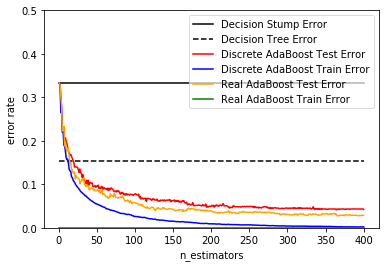

In [247]:
n_estimators = 400
learning_rate = 1
X_test,y_test = TestData, TestLabel
X_train,y_train = TrainData, TrainLabel
 
dt_stump=DecisionTreeClassifier(max_depth=1,min_samples_leaf=1)
dt_stump.fit(X_train,y_train)
dt_stump_err=1.0-dt_stump.score(X_test,y_test)
 
dt=DecisionTreeClassifier(max_depth=9,min_samples_leaf=1)
dt.fit(X_train,y_train)
dt_err=1.0-dt.score(X_test,y_test)
 
ada_discrete=AdaBoostClassifier(base_estimator=dt_stump,learning_rate=learning_rate,n_estimators=n_estimators,algorithm='SAMME')
ada_discrete.fit(X_train,y_train)
 
ada_real=AdaBoostClassifier(base_estimator=dt_stump,learning_rate=learning_rate,n_estimators=n_estimators,algorithm='SAMME.R')
ada_real.fit(X_train,y_train)
 
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot([1,n_estimators],[dt_stump_err]*2,'k-',label='Decision Stump Error')
ax.plot([1,n_estimators],[dt_err]*2,'k--',label='Decision Tree Error')
 
ada_discrete_err=np.zeros((n_estimators,))
for i,y_pred in enumerate(ada_discrete.staged_predict(X_test)):
    ada_discrete_err[i]=zero_one_loss(y_pred,y_test)    ######zero_one_loss
ada_discrete_err_train=np.zeros((n_estimators,))
for i,y_pred in enumerate(ada_discrete.staged_predict(X_train)):
    ada_discrete_err_train[i]=zero_one_loss(y_pred,y_train)
    
ada_real_err=np.zeros((n_estimators,))
for i,y_pred in enumerate(ada_real.staged_predict(X_test)):
    ada_real_err[i]=zero_one_loss(y_pred,y_test)
ada_real_err_train=np.zeros((n_estimators,))
for i,y_pred in enumerate(ada_real.staged_predict(X_train)):
    ada_discrete_err_train[i]=zero_one_loss(y_pred,y_train)

ax.plot(np.arange(n_estimators)+1,ada_discrete_err,label='Discrete AdaBoost Test Error',color='red')
ax.plot(np.arange(n_estimators)+1,ada_discrete_err_train,label='Discrete AdaBoost Train Error',color='blue')
ax.plot(np.arange(n_estimators)+1,ada_real_err,label='Real AdaBoost Test Error',color='orange')
ax.plot(np.arange(n_estimators)+1,ada_real_err_train,label='Real AdaBoost Train Error',color='green')
 
ax.set_ylim((0.0,0.5))
ax.set_xlabel('n_estimators')
ax.set_ylabel('error rate')
 
leg=ax.legend(loc='upper right',fancybox=True)
leg.get_frame().set_alpha(0.7)
b=time.time()
print('total running time of this example is :',b-a)
plt.show()
    